# Title:> Predicting E-Commerce Shipping Status

In [1]:
import warnings 
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
# Loading Dataset
data=pd.read_csv("E:\Downloads Files\DD\Train.csv")
data

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


In [4]:
# checking the shape of data
data.shape

(10999, 12)

In [5]:
# information about the column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [6]:
# display the columns name
data.columns

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

In [7]:
# checking the type of columns whether it is categoriacal or numerical
data.dtypes

ID                      int64
Warehouse_block        object
Mode_of_Shipment       object
Customer_care_calls     int64
Customer_rating         int64
Cost_of_the_Product     int64
Prior_purchases         int64
Product_importance     object
Gender                 object
Discount_offered        int64
Weight_in_gms           int64
Reached.on.Time_Y.N     int64
dtype: object

In [8]:
# the column which we are not going to use ,we can drop them
data=data.drop(["ID"],axis=1)

In [9]:
#Cheacking for null values
data.isnull().sum()

Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [10]:
#Data type Conversion
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [11]:
data.Warehouse_block =le.fit_transform(data.Warehouse_block )
data.Mode_of_Shipment=le.fit_transform(data.Mode_of_Shipment)
data.Product_importance=le.fit_transform(data.Product_importance)
data.Gender=le.fit_transform(data.Gender)
data["Reached.on.Time_Y.N"]=le.fit_transform(data["Reached.on.Time_Y.N"])   

In [12]:
data.rename(columns={"Reached.on.Time_Y.N" :"Reached_on_Time_Y_N"},inplace=True)

In [13]:
data.dtypes

Warehouse_block        int32
Mode_of_Shipment       int32
Customer_care_calls    int64
Customer_rating        int64
Cost_of_the_Product    int64
Prior_purchases        int64
Product_importance     int32
Gender                 int32
Discount_offered       int64
Weight_in_gms          int64
Reached_on_Time_Y_N    int64
dtype: object

# Model Fitting

# 1) Logistic Regression

In [14]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
from sklearn.metrics import confusion_matrix

In [15]:
x=data.iloc[: ,0:-1]
y=data.iloc[:,-1]

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((8799, 10), (2200, 10), (8799,), (2200,))

In [17]:
lg.fit(x_train,y_train)

LogisticRegression()

In [18]:
p1=lg.predict(x_test)
#p1

In [19]:
cf=confusion_matrix(p1,y_test)
cf

array([[532, 433],
       [357, 878]], dtype=int64)

In [20]:
ac1=cf.diagonal().sum()/cf.sum()*100
ac1

64.0909090909091

In [21]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [22]:
re1=recall_score(y_test,p1)
pr1=precision_score(y_test,p1)
f1=f1_score(y_test,p1)
print("\n",classification_report(y_test,p1))


               precision    recall  f1-score   support

           0       0.55      0.60      0.57       889
           1       0.71      0.67      0.69      1311

    accuracy                           0.64      2200
   macro avg       0.63      0.63      0.63      2200
weighted avg       0.65      0.64      0.64      2200



# 2)Decision Tree

In [23]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [24]:
dt_p=dt.predict(x_test)
#dt_p

In [25]:
dt_c=confusion_matrix(dt_p,y_test)
dt_c

array([[489, 365],
       [400, 946]], dtype=int64)

In [26]:
dt_ac=dt_c.diagonal().sum()/dt_c.sum()*100
dt_ac

65.22727272727272

In [27]:
re2=recall_score(y_test,dt_p)
pr2=precision_score(y_test,dt_p)
f2=f1_score(y_test,dt_p)
print(classification_report(y_test,dt_p))

              precision    recall  f1-score   support

           0       0.57      0.55      0.56       889
           1       0.70      0.72      0.71      1311

    accuracy                           0.65      2200
   macro avg       0.64      0.64      0.64      2200
weighted avg       0.65      0.65      0.65      2200



# 3) Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [29]:
rf_p=rf.predict(x_test)

In [30]:
rf_c=confusion_matrix(rf_p,y_test)
rf_c

array([[616, 460],
       [273, 851]], dtype=int64)

In [31]:
rf_ac=rf_c.diagonal().sum()/rf_c.sum()*100
rf_ac

66.68181818181819

In [32]:
re3=recall_score(y_test,rf_p)
pr3=precision_score(y_test,rf_p)
f3=f1_score(y_test,rf_p)
print(classification_report(rf_p,y_test))

              precision    recall  f1-score   support

           0       0.69      0.57      0.63      1076
           1       0.65      0.76      0.70      1124

    accuracy                           0.67      2200
   macro avg       0.67      0.66      0.66      2200
weighted avg       0.67      0.67      0.66      2200



# 4) K-Nereset Neighbors

In [33]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [34]:
knn_p=knn.predict(x_test)

In [35]:
knn_c=confusion_matrix(knn_p,y_test)
knn_c

array([[531, 400],
       [358, 911]], dtype=int64)

In [36]:
knn_ac=knn_c.diagonal().sum()/knn_c.sum()*100
knn_ac

65.54545454545455

In [37]:
re4=recall_score(y_test,knn_p)
pr4=precision_score(y_test,knn_p)
f4=f1_score(y_test,knn_p)
print(classification_report(knn_p,y_test))

              precision    recall  f1-score   support

           0       0.60      0.57      0.58       931
           1       0.69      0.72      0.71      1269

    accuracy                           0.66      2200
   macro avg       0.65      0.64      0.64      2200
weighted avg       0.65      0.66      0.65      2200



# 5)XGB(XGBoost)

In [38]:
import xgboost
from xgboost import XGBClassifier

In [39]:
xgb=XGBClassifier()
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [40]:
xgb_p=xgb.predict(x_test)
#xgb_p

In [41]:
xgb_c=confusion_matrix(y_test,xgb_p)
xgb_c

array([[568, 321],
       [441, 870]], dtype=int64)

In [42]:
xgb_ac=xgb_c.diagonal().sum()/xgb_c.sum()*100
xgb_ac

65.36363636363637

In [43]:
re5=recall_score(y_test,xgb_p)
pr5=precision_score(y_test,xgb_p)
f5=f1_score(y_test,xgb_p)
print(classification_report(y_test,xgb_p))

              precision    recall  f1-score   support

           0       0.56      0.64      0.60       889
           1       0.73      0.66      0.70      1311

    accuracy                           0.65      2200
   macro avg       0.65      0.65      0.65      2200
weighted avg       0.66      0.65      0.66      2200



# 6)SUPPORT VECTOR MACHINE

In [44]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(x_train,y_train)

SVC()

In [45]:
s_p=svm.predict(x_test)

In [46]:
s_cf=confusion_matrix(y_test,s_p)
s_cf

array([[559, 330],
       [403, 908]], dtype=int64)

In [47]:
s_ac=s_cf.diagonal().sum()/s_cf.sum()*100
s_ac

66.68181818181819

In [48]:
re6=recall_score(y_test,s_p)
pr6=precision_score(y_test,s_p)
f6=f1_score(y_test,s_p)
print(classification_report(s_p,y_test))

              precision    recall  f1-score   support

           0       0.63      0.58      0.60       962
           1       0.69      0.73      0.71      1238

    accuracy                           0.67      2200
   macro avg       0.66      0.66      0.66      2200
weighted avg       0.66      0.67      0.67      2200



# 7)Naive Bayes

In [49]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
nb.fit(x_train,y_train)

MultinomialNB()

In [50]:
nb_p=nb.predict(x_test)

In [51]:
nb_c=confusion_matrix(y_test,nb_p)
nb_c

array([[681, 208],
       [521, 790]], dtype=int64)

In [52]:
nb_ac=nb_c.diagonal().sum()/nb_c.sum()*100
nb_ac

66.86363636363636

In [53]:
re7=recall_score(y_test,nb_p)
pr7=precision_score(y_test,nb_p)
f7=f1_score(y_test,nb_p)
print(classification_report(y_test,nb_p))

              precision    recall  f1-score   support

           0       0.57      0.77      0.65       889
           1       0.79      0.60      0.68      1311

    accuracy                           0.67      2200
   macro avg       0.68      0.68      0.67      2200
weighted avg       0.70      0.67      0.67      2200



# Basic Model Result

In [54]:
Model=["Logistic Regression","Decision Tree","Random Forest","KNN","XGB(XGBoost)","SUPPORT VECTOR MACHINE","Naive Bayes"]
Accuracy=[ac1,dt_ac,rf_ac,knn_ac,xgb_ac,s_ac,nb_ac]
f1_score=[f1,f2,f3,f4,f5,f6,f7]
recall=[re1,re2,re3,re4,re5,re6,re7]
precision=[pr1,pr2,pr3,pr4,pr5,pr6,pr7]

In [55]:
DataFrame1=pd.DataFrame({"Model":Model,"Accuracy":Accuracy,"f1-score":f1_score,"recall":recall,"precision":precision})  
DataFrame1

,Model,Accuracy,f1-score,recall,precision
0,Logistic Regression,64.090909,0.689709,0.669718,0.710931
1,Decision Tree,65.227273,0.712081,0.721587,0.702823
2,Random Forest,66.681818,0.698973,0.649123,0.757117
3,KNN,65.545455,0.706202,0.694889,0.717888
4,XGB(XGBoost),65.363636,0.695444,0.663616,0.730479
5,SUPPORT VECTOR MACHINE,66.681818,0.712436,0.692601,0.733441
6,Naive Bayes,66.863636,0.684279,0.602593,0.791583


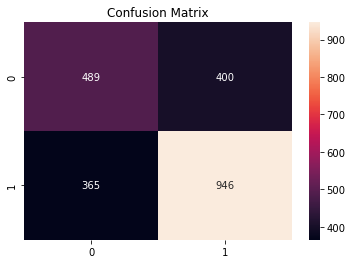

In [56]:
#Confusion matrix for Decision Tree model because the performance of model is good as compare to other model
cm=confusion_matrix(y_test,dt_p)
sns.heatmap(cm,annot=True,fmt='d')
plt.title('Confusion Matrix')
plt.show()

From the above Confusion Matrix as the True negatives high as compare to true positive so we can conclude the result by using PRC curve

In [57]:
# Precision -recall Curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
precision,recall,threshold=precision_recall_curve(y_test,dt_p)

Text(0.5, 1.0, 'PRC-CURVE')

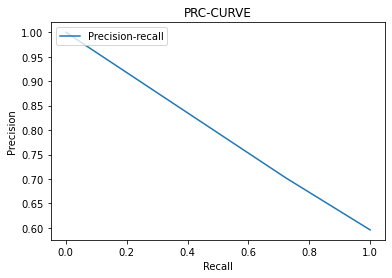

In [58]:
plt.plot(recall,precision,label="Precision-recall")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="upper left")
plt.title("PRC-CURVE")

Conclusion=
In general, the performance of all models is very low, but if it is necessary to choose the best model,if you have to pick a single model it should be Decision Tree because the accuracy,F1 score,Recall,precesion of model is good as compare to other model

# Class Imbalance

In [59]:
# 1)Random Oversampling

In [60]:
data.shape

(10999, 11)

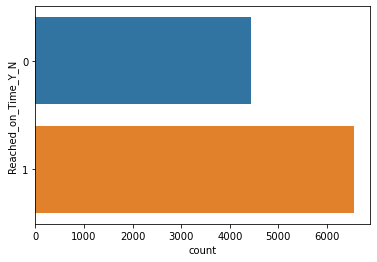

In [61]:
sns.countplot(data=data,y="Reached_on_Time_Y_N")
plt.show()

About 60% of orders are NOT delivered on time, and the other 40% are delivered as estimated

In [62]:
data["Reached_on_Time_Y_N"].value_counts()# 1 =Not Reached on Time ,0=reached on time

1    6563
0    4436
Name: Reached_on_Time_Y_N, dtype: int64

In [63]:
count_1,count_0=data["Reached_on_Time_Y_N"].value_counts()
count_1,count_0

(6563, 4436)

In [64]:
train_0=data[data["Reached_on_Time_Y_N"]==0]
train_0.head(2)

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached_on_Time_Y_N
3135,1,1,6,5,141,3,2,1,8,5031,0
3136,2,1,3,3,219,3,1,1,4,5956,0


In [65]:
train_1=data[data["Reached_on_Time_Y_N"]==1]
train_1.head(2)

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached_on_Time_Y_N
0,3,0,4,2,177,3,1,0,44,1233,1
1,4,0,4,5,216,2,1,1,59,3088,1


In [66]:
train_0.shape,train_1.shape

((4436, 11), (6563, 11))

In [67]:
class_0_over=train_0.sample(count_1,replace=True)
class_0_over.shape,train_1.shape

((6563, 11), (6563, 11))

In [68]:
data1=pd.concat([class_0_over,train_1],axis=0)
data1.shape

(13126, 11)

In [69]:
data1["Reached_on_Time_Y_N"].value_counts()

0    6563
1    6563
Name: Reached_on_Time_Y_N, dtype: int64

In [70]:
#SMOTE
#x0=data.iloc[: ,0:-1]
#y0=data.iloc[:,-1]
#y0.shape
#from imblearn.over_sampling import SMOTE
#smote=SMOTE()
#x11,y11=smote.fit_resample(x0,y0)
#y11.value_counts()
#data1=pd.concat([x11,y11],axis=1)
#data1.shape

# outliers treatment

In [71]:
# Checking For Outliers

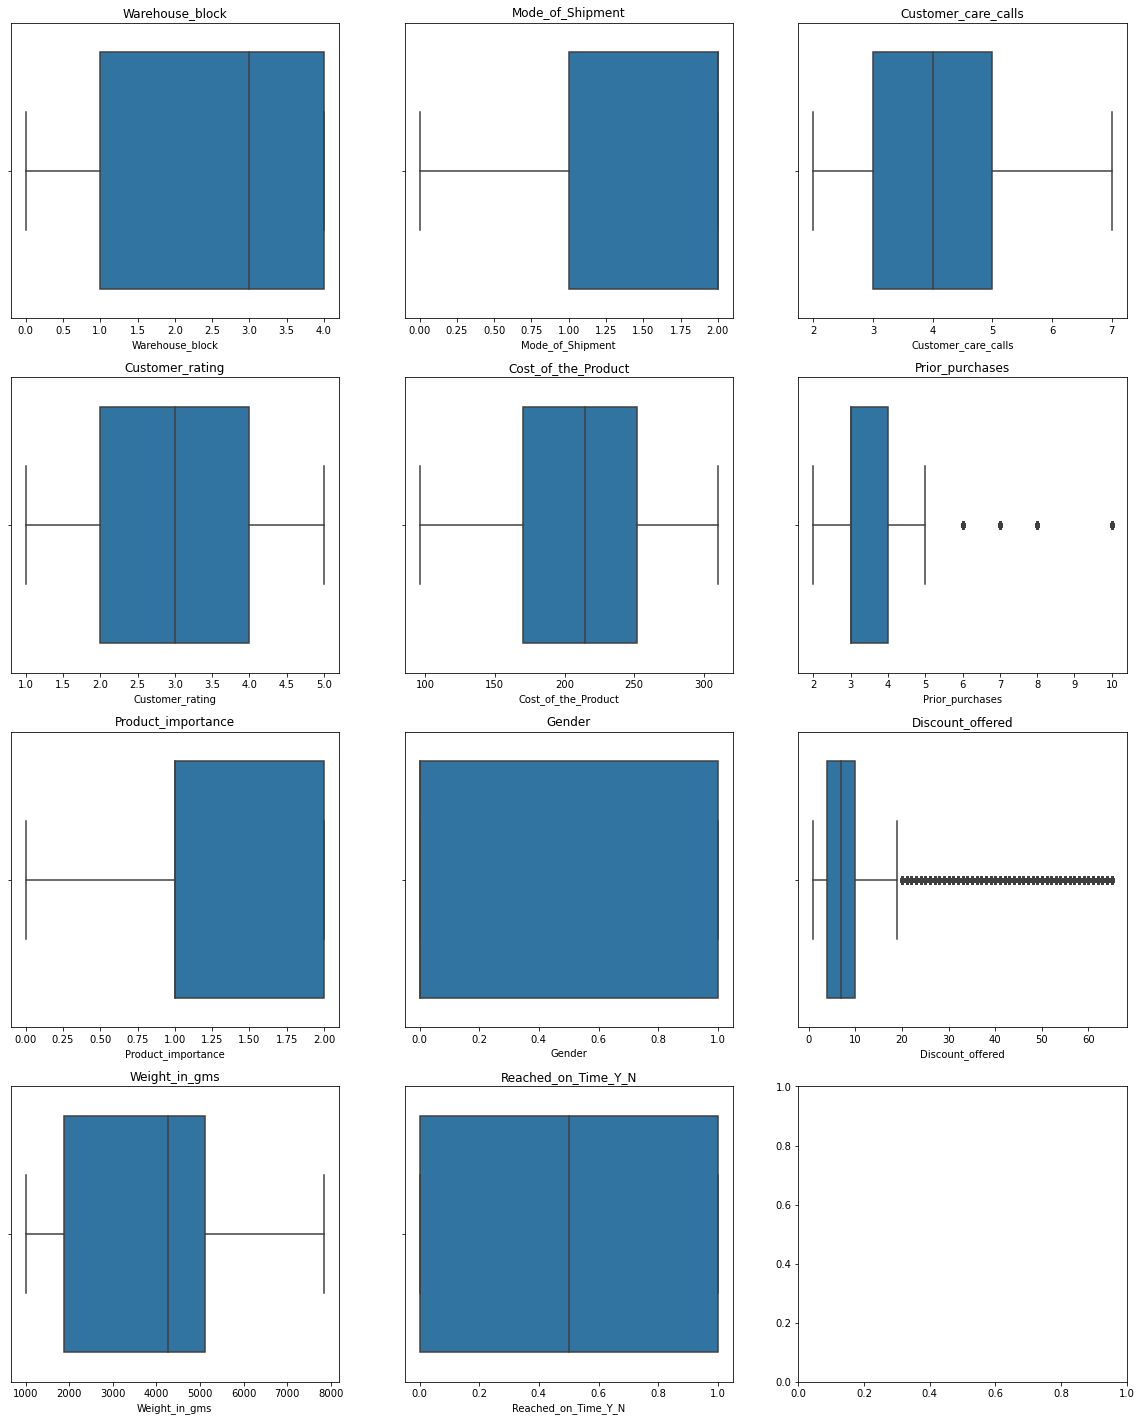

In [72]:
num_cols=data1.columns
fig,ax=plt.subplots(4,3,figsize=(20,25))
index=0
ax=ax.flatten()
for i in data1:
        sns.boxplot(data1[i],ax=ax[index])
        ax[index].set_title(i)
        index+=1
plt.show()

From The above box plot it is observe that outliers are present in Discount offered and prior purches column

In [73]:
# To check which column is numerical and which column is categorical 
#1)Warehouse_block
data1.Warehouse_block.value_counts()

4    4348
3    2224
2    2203
0    2179
1    2172
Name: Warehouse_block, dtype: int64

In [74]:
#2)Mode_of_Shipment
data1.Mode_of_Shipment.value_counts()

2    8919
1    2141
0    2066
Name: Mode_of_Shipment, dtype: int64

In [75]:
#3)Customer_care_calls
data1.Customer_care_calls.value_counts()

4    4247
3    3844
5    2763
6    1200
2     769
7     303
Name: Customer_care_calls, dtype: int64

In [76]:
data1.Customer_care_calls.describe()

count    13126.000000
mean         4.052567
std          1.143886
min          2.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          7.000000
Name: Customer_care_calls, dtype: float64

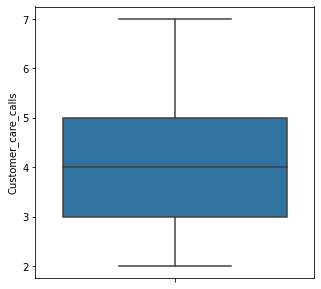

In [77]:
fig=plt.figure(figsize=(5,5))
sns.boxplot(data=data1,y="Customer_care_calls")
plt.show()

In [78]:
#4)Customer_rating
data1.Customer_rating.value_counts()

3    2690
1    2642
4    2605
2    2601
5    2588
Name: Customer_rating, dtype: int64

In [79]:
#5)Cost_of_the_Product
data1.Cost_of_the_Product.value_counts()

260    144
254    136
245    134
257    129
258    122
      ... 
303      6
288      6
119      6
122      5
96       5
Name: Cost_of_the_Product, Length: 215, dtype: int64

<AxesSubplot:ylabel='Cost_of_the_Product'>

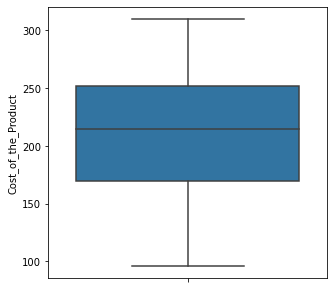

In [80]:
fig=plt.figure(figsize=(5,5))
sns.boxplot(data=data1,y="Cost_of_the_Product")

No outliers present in this column

In [81]:
#6)Product_importance
data1.Product_importance.value_counts()

1    6247
2    5749
0    1130
Name: Product_importance, dtype: int64

In [82]:
#7)Prior_purchases
data1.Prior_purchases.value_counts()

3     4622
2     3145
4     2576
5     1563
6      706
10     207
7      163
8      144
Name: Prior_purchases, dtype: int64

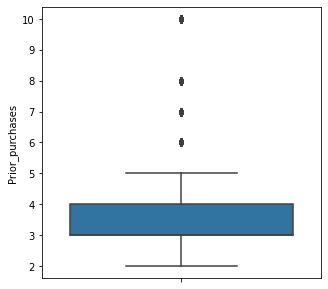

In [83]:
fig=plt.figure(figsize=(5,5))
sns.boxplot(data=data1,y="Prior_purchases")
plt.show()

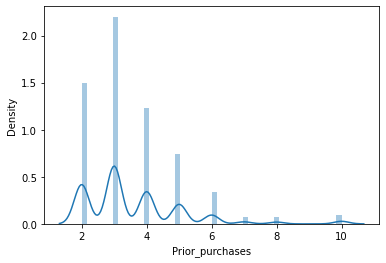

In [84]:
sns.distplot(data1.Prior_purchases) # Skewed data
plt.show()

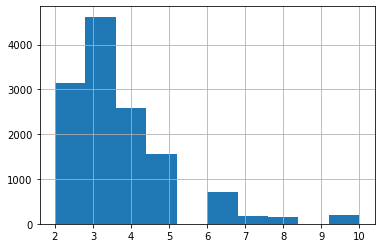

In [85]:
data1.Prior_purchases.hist()
plt.show()

In [86]:
data1.Prior_purchases.skew()

1.6411609922684018

In [87]:
IQR=data1.Prior_purchases.quantile(0.75)-data1.Prior_purchases.quantile(0.25)
IQR 

1.0

In [88]:
ub1=data1.Prior_purchases.quantile(0.75)+1.5*IQR  
lb1=data1.Prior_purchases.quantile(0.25)-1.5*IQR
print(ub1,lb1)

5.5 1.5


In [89]:
data1.loc[data1["Prior_purchases"]>5.5,"Prior_purchases"]=5.5

In [90]:
data1.Prior_purchases.skew() 

0.40264753030402867

after treating with outlier we got the skewness is 0.3940

In [91]:
#8)Gender
data1.Gender.value_counts()

0    6644
1    6482
Name: Gender, dtype: int64

In [92]:
#9).Discount_offered
data1.Discount_offered.value_counts() 

9     1125
2     1069
10    1062
6     1056
5     1052
      ... 
26      36
65      36
42      35
25      34
30      34
Name: Discount_offered, Length: 65, dtype: int64

In [93]:
data1.Discount_offered.describe()

count    13126.000000
mean        12.111687
std         15.154182
min          1.000000
25%          4.000000
50%          7.000000
75%         10.000000
max         65.000000
Name: Discount_offered, dtype: float64

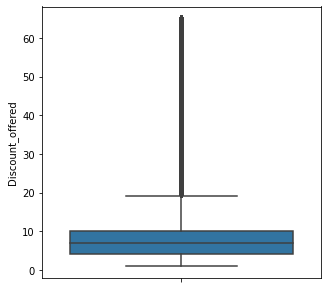

In [94]:
fig=plt.figure(figsize=(5,5))
sns.boxplot(data=data1,y="Discount_offered")
plt.show()

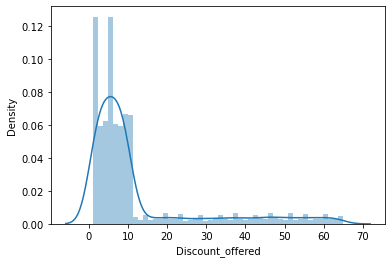

In [95]:
sns.distplot(data1.Discount_offered)
plt.show()

<AxesSubplot:>

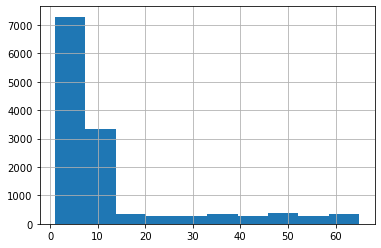

In [96]:
data1.Discount_offered.hist()

In [97]:
data1.Discount_offered.skew()

2.0625408261082954

In [98]:
IQR2=data1.Discount_offered.quantile(0.75)-data1.Discount_offered.quantile(0.25)
IQR2

6.0

In [99]:
ub2=data1.Discount_offered.quantile(0.75)+1.5*IQR2  #upper boundary formula  with 1.5 SD
lb2=data1.Discount_offered.quantile(0.25)-1.5*IQR2
print(ub2,lb2)

19.0 -5.0


In [100]:
data1.loc[data1["Discount_offered"]>19.0 ,"Discount_offered"]=19.0

In [101]:
data1.Discount_offered.skew()

0.8563601089709475

In [102]:
#10)Weight_in_gms
data1.Weight_in_gms.value_counts()

4632    17
4930    16
4200    16
5021    15
1220    15
        ..
2648     1
3945     1
2632     1
3654     1
1649     1
Name: Weight_in_gms, Length: 3974, dtype: int64

In [103]:
data1.Weight_in_gms.describe()

count    13126.000000
mean      3734.937452
std       1634.245005
min       1001.000000
25%       1879.000000
50%       4277.000000
75%       5121.000000
max       7846.000000
Name: Weight_in_gms, dtype: float64

<AxesSubplot:ylabel='Weight_in_gms'>

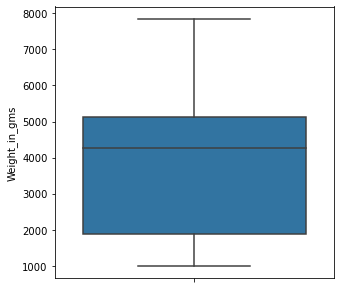

In [104]:
fig=plt.figure(figsize=(5,5))
sns.boxplot(data=data1,y="Weight_in_gms")

No outliers present in .Weight_in_gms column

# Skewness Treatment

In [105]:
data1.skew()

Warehouse_block       -0.283004
Mode_of_Shipment      -1.189264
Customer_care_calls    0.399035
Customer_rating        0.005237
Cost_of_the_Product   -0.171753
Prior_purchases        0.402648
Product_importance    -0.451102
Gender                 0.024689
Discount_offered       0.856360
Weight_in_gms         -0.361581
Reached_on_Time_Y_N    0.000000
dtype: float64

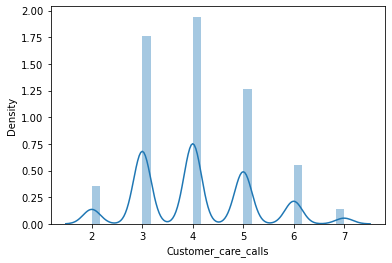

In [106]:
sns.distplot(data1.Customer_care_calls) 
plt.show()

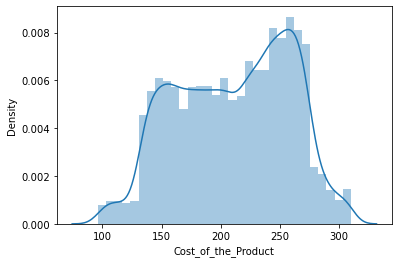

In [107]:
sns.distplot(data1.Cost_of_the_Product) 
plt.show()

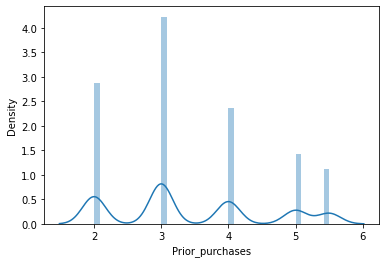

In [108]:
sns.distplot(data1.Prior_purchases) 
plt.show()

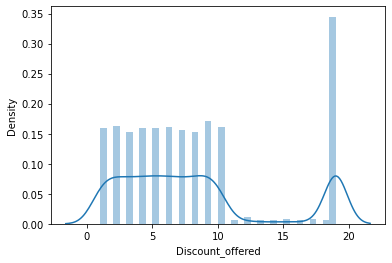

In [109]:
sns.distplot(data1.Discount_offered )
plt.show()

In [111]:
data1["Discount_offered"]=np.sqrt(data1["Discount_offered"])
data1["Weight_in_gms"]=np.sqrt(data1["Weight_in_gms"])

In [112]:
data1.skew()

Warehouse_block       -0.283004
Mode_of_Shipment      -1.189264
Customer_care_calls    0.399035
Customer_rating        0.005237
Cost_of_the_Product   -0.171753
Prior_purchases        0.402648
Product_importance    -0.451102
Gender                 0.024689
Discount_offered       0.284733
Weight_in_gms         -0.542008
Reached_on_Time_Y_N    0.000000
dtype: float64

After skewness Treatment we got the result as above

# Visualization

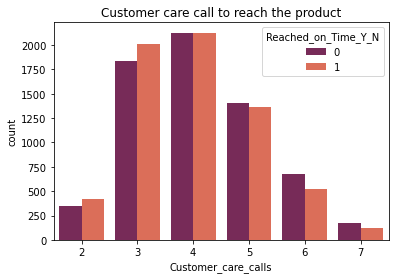

In [113]:
# count plot
sns.countplot(x='Customer_care_calls',hue='Reached_on_Time_Y_N',data=data1,palette='rocket')
plt.title("Customer care call to reach the product")
plt.show()

we can see there are more than 2000 instances where the customer has to call 4 times in order get the package delivered

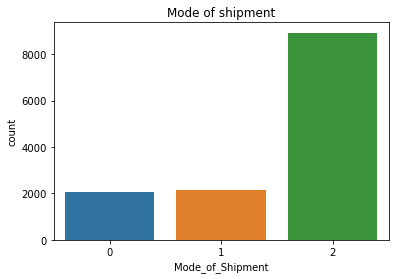

In [114]:
# CountPlot
sns.countplot(x ="Mode_of_Shipment",data =data1)
data1["Mode_of_Shipment"].value_counts()
plt.title("Mode of shipment")
plt.show()
#0:Flight,1:Road,3:Ship

Maximum number of transformation has done by ship as compare to other

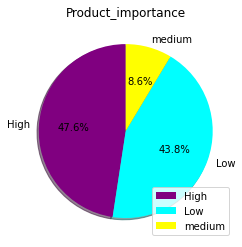

In [115]:
# Pie Chart
Product_importance = data1["Product_importance"].value_counts()
fig,ax = plt.subplots()
label=["High","Low","medium"]
color=["purple","cyan","yellow"]
ax.pie(Product_importance,labels=label,colors=color,autopct='%1.1f%%',shadow=True, startangle=90)
ax.set(aspect="equal", title='Product_importance')
plt.legend(loc="lower right")
fig.show()

From the above graph we observe that About 48% of the orders are of low priority and the rest is made up of 43% medium priorty and the other ~9% is high priority

In [116]:
v=data1.corr()
v

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached_on_Time_Y_N
Warehouse_block,1.000000,0.001978,0.015953,0.006637,0.000832,-0.003502,-0.003872,-0.008904,0.002547,-0.001962,0.003586
Mode_of_Shipment,0.001978,1.000000,-0.013587,-0.002710,0.005144,-0.010531,0.012255,-0.016068,0.001304,-0.000227,-0.007403
Customer_care_calls,0.015953,-0.013587,1.000000,-0.002763,0.322328,0.269850,0.000441,0.015621,-0.105321,-0.321472,-0.053417
Customer_rating,0.006637,-0.002710,-0.002763,1.000000,0.001055,0.001011,-0.011046,0.002955,-0.002245,0.003361,0.009720
Cost_of_the_Product,0.000832,0.005144,0.322328,0.001055,1.000000,0.181210,0.007238,0.029362,-0.116707,-0.172442,-0.070959
Prior_purchases,-0.003502,-0.010531,0.269850,0.001011,0.181210,1.000000,0.019188,-0.005910,-0.088702,-0.293604,-0.066015
Product_importance,-0.003872,0.012255,0.000441,-0.011046,0.007238,0.019188,1.000000,-0.007707,0.000438,0.002980,-0.028540
Gender,-0.008904,-0.016068,0.015621,0.002955,0.029362,-0.005910,-0.007707,1.000000,-0.015740,-0.013258,0.007924
Discount_offered,0.002547,0.001304,-0.105321,-0.002245,-0.116707,-0.088702,0.000438,-0.015740,1.000000,-0.315540,0.393098
Weight_in_gms,-0.001962,-0.000227,-0.321472,0.003361,-0.172442,-0.293604,0.002980,-0.013258,-0.315540,1.000000,-0.267110


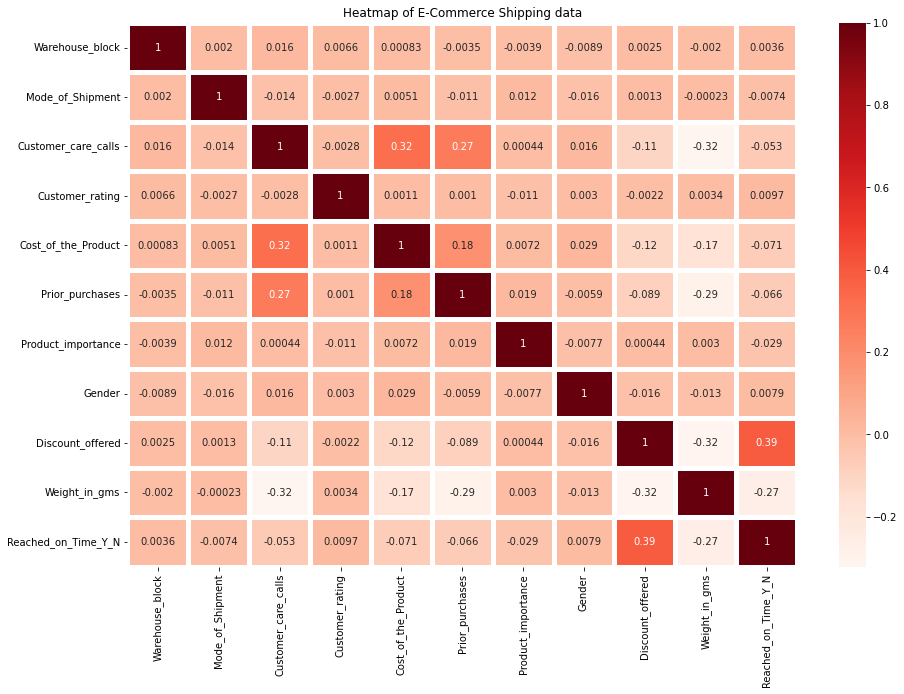

In [117]:
# Heat Map
plt.figure(figsize=(15,10))
heatmap=sns.heatmap(v,linewidth=5,annot=True,cmap=plt.cm.Reds)
plt.title("Heatmap of E-Commerce Shipping data")
plt.show()

From the above heat map it is observe that there is a correlation between whether the product is reached on time or not and discount offered which is the low correlation The product discount is the feature that most highly correlates to if a product is delivered on time



<AxesSubplot:title={'center':'Weight_in_gms vs Cost_of_the_Product'}, xlabel='Weight_in_gms'>

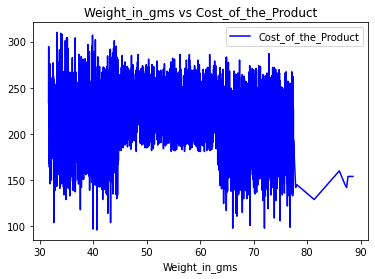

In [118]:
# Line Chart
a= data1.pivot_table(index="Weight_in_gms",values="Cost_of_the_Product",aggfunc="mean")
a.plot(color='blue',title = "Weight_in_gms vs Cost_of_the_Product")

From the above graph we can conclude that as weight of the product increases cost of the product is also increases.


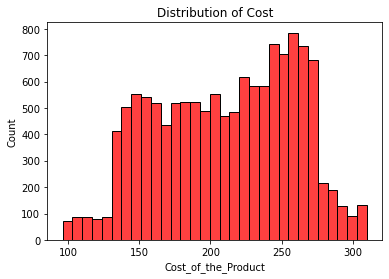

In [119]:
# Histogram
sns.histplot(data1.Cost_of_the_Product,color="red")
plt.title(f'Distribution of Cost')
plt.show()

Most orders cost between 150-250 rs

# Base Model 2

# 1)Logistic Regression

In [120]:
x1=data1.iloc[: ,0:-1]
y1=data1.iloc[:,-1]

In [121]:
x_train1,x_test1,y_train1,y_test1=train_test_split(x1,y1,test_size=0.2,random_state=101)
x_train1.shape,x_test1.shape,y_train1.shape,y_test1.shape

((10500, 10), (2626, 10), (10500,), (2626,))

In [122]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,accuracy_score,f1_score
from sklearn.linear_model import LogisticRegression
lg1=LogisticRegression()

In [123]:
lg1.fit(x_train1,y_train1)

LogisticRegression()

In [124]:
lg_p2=lg1.predict(x_test1)

In [125]:
cf_2=confusion_matrix(lg_p2,y_test1)
cf_2

array([[955, 545],
       [371, 755]], dtype=int64)

In [126]:
lg_ac2=cf_2.diagonal().sum()/cf_2.sum()*100
lg_ac2

65.11805026656512

In [127]:
re_21=recall_score(y_test1,lg_p2)
pr_21=precision_score(y_test1,lg_p2)
f21=f1_score(y_test1,lg_p2,average="weighted")
print(classification_report(lg_p2,y_test1)) 

              precision    recall  f1-score   support

           0       0.72      0.64      0.68      1500
           1       0.58      0.67      0.62      1126

    accuracy                           0.65      2626
   macro avg       0.65      0.65      0.65      2626
weighted avg       0.66      0.65      0.65      2626



# 2) Decision Tree

In [128]:
from sklearn.tree import DecisionTreeClassifier
dt1=DecisionTreeClassifier()

In [129]:
dt1.fit(x_train1,y_train1)

DecisionTreeClassifier()

In [130]:
dt_p2=dt1.predict(x_test1)
#dt_p2

In [131]:
dt_c2=confusion_matrix(dt_p2,y_test1)
dt_c2

array([[1147,  357],
       [ 179,  943]], dtype=int64)

In [132]:
dt_ac2=dt_c2.diagonal().sum()/dt_c2.sum()*100
dt_ac2

79.58872810357958

In [133]:
re_22=recall_score(y_test1,dt_p2)
pr_22=precision_score(y_test1,dt_p2)
f22=f1_score(y_test1,dt_p2,average="weighted")
print(classification_report(dt_p2,y_test1))

              precision    recall  f1-score   support

           0       0.87      0.76      0.81      1504
           1       0.73      0.84      0.78      1122

    accuracy                           0.80      2626
   macro avg       0.80      0.80      0.79      2626
weighted avg       0.81      0.80      0.80      2626



# 3)Random Forest

In [134]:
from sklearn.ensemble import RandomForestClassifier
rf2=RandomForestClassifier()
rf2.fit(x_train1,y_train1)

RandomForestClassifier()

In [135]:
rf_p2=rf2.predict(x_test1)

In [136]:
from sklearn.ensemble import RandomForestClassifier
rf2=RandomForestClassifier()
rf2.fit(x_train1,y_train1)

RandomForestClassifier()

In [137]:
rf_p2=rf2.predict(x_test1)

In [138]:
rf_c2=confusion_matrix(rf_p2,y_test1)
rf_c2

array([[1195,  480],
       [ 131,  820]], dtype=int64)

In [139]:
rf_ac2=rf_c2.diagonal().sum()/rf_c2.sum()*100
rf_ac2

76.73267326732673

In [140]:
re_23=recall_score(y_test1,rf_p2)
pr_23=precision_score(y_test1,rf_p2)
f23=f1_score(rf_p2,y_test1,average="weighted")
print(classification_report(rf_p2,y_test1))

              precision    recall  f1-score   support

           0       0.90      0.71      0.80      1675
           1       0.63      0.86      0.73       951

    accuracy                           0.77      2626
   macro avg       0.77      0.79      0.76      2626
weighted avg       0.80      0.77      0.77      2626



# 4) K-Nearset Neighbourhood

In [141]:
from sklearn.neighbors import KNeighborsClassifier
knn1=KNeighborsClassifier()
knn1.fit(x_train1,y_train1)

KNeighborsClassifier()

In [142]:
knn_p2=knn1.predict(x_test1)

In [143]:
knn_c2=confusion_matrix(knn_p2,y_test1)
knn_c2

array([[1086,  470],
       [ 240,  830]], dtype=int64)

In [144]:
knn_ac2=knn_c2.diagonal().sum()/knn_c2.sum()*100
knn_ac2

72.96268088347297

In [145]:
re_24=recall_score(y_test1,knn_p2)
pr_24=precision_score(y_test1,knn_p2)
f24=f1_score(knn_p2,y_test1,average="weighted")
print(classification_report(knn_p2,y_test1))

              precision    recall  f1-score   support

           0       0.82      0.70      0.75      1556
           1       0.64      0.78      0.70      1070

    accuracy                           0.73      2626
   macro avg       0.73      0.74      0.73      2626
weighted avg       0.75      0.73      0.73      2626



# 5) XGB(XGBoost)

In [146]:
import xgboost
from xgboost import XGBClassifier

In [147]:
xgb1=XGBClassifier()

In [148]:
xgb1.fit(x_train1,y_train1)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [149]:
xgb_p2=xgb1.predict(x_test1)
#xgb_p2

In [150]:
xgb_c2=confusion_matrix(xgb_p2,y_test1)
xgb_c2

array([[1186,  490],
       [ 140,  810]], dtype=int64)

In [151]:
xgb_ac2=xgb_c2.diagonal().sum()/xgb_c2.sum()*100
xgb_ac2

76.00913937547601

In [152]:
re_25=recall_score(y_test1,xgb_p2)
pr_25=precision_score(y_test1,xgb_p2)
f25=f1_score(xgb_p2,y_test1,average="weighted")
print(classification_report(xgb_p2,y_test1))

              precision    recall  f1-score   support

           0       0.89      0.71      0.79      1676
           1       0.62      0.85      0.72       950

    accuracy                           0.76      2626
   macro avg       0.76      0.78      0.76      2626
weighted avg       0.80      0.76      0.76      2626



# 6) SUPPORT VECTOR MACHINE¶

In [153]:
from sklearn.svm import SVC
svm1=SVC()

In [154]:
svm1.fit(x_train1,y_train1)

SVC()

In [155]:
s_p2=svm1.predict(x_test1)

In [156]:
s_cf2=confusion_matrix(y_test1,s_p2)
s_cf2

array([[1106,  220],
       [ 609,  691]], dtype=int64)

In [157]:
s_ac2=s_cf2.diagonal().sum()/s_cf2.sum()*100
s_ac2

68.43107387661843

In [158]:
re_26=recall_score(y_test1,s_p2)
pr_26=precision_score(y_test1,s_p2)
f26=f1_score(y_test1,s_p2,average="weighted")
print(classification_report(s_p2,y_test1))

              precision    recall  f1-score   support

           0       0.83      0.64      0.73      1715
           1       0.53      0.76      0.63       911

    accuracy                           0.68      2626
   macro avg       0.68      0.70      0.68      2626
weighted avg       0.73      0.68      0.69      2626



# 7) Naive Bayes

In [159]:
from sklearn.naive_bayes import MultinomialNB
nb1=MultinomialNB()

In [160]:
nb1.fit(x_train1,y_train1)

MultinomialNB()

In [161]:
nb_p2=nb1.predict(x_test1)

In [162]:
cf_n2=confusion_matrix(y_test1,nb_p2)
cf_n2


array([[959, 367],
       [484, 816]], dtype=int64)

In [163]:
nb_ac2=cf_n2.diagonal().sum()/cf_n2.sum()*100
nb_ac2

67.5932977913176

In [164]:
re_27=recall_score(y_test1,nb_p2)
pr_27=precision_score(y_test1,nb_p2)
f27=f1_score(y_test1,nb_p2,average="weighted")
print(classification_report(nb_p2,y_test1))

              precision    recall  f1-score   support

           0       0.72      0.66      0.69      1443
           1       0.63      0.69      0.66      1183

    accuracy                           0.68      2626
   macro avg       0.68      0.68      0.67      2626
weighted avg       0.68      0.68      0.68      2626



In [165]:
Model2=["Logistic Regression","Decision Tree","Random Forest","KNN","XGB(XGBoost)","SUPPORT VECTOR MACHINE","Naive Bayes"]
Accuracy2=[lg_ac2,dt_ac2,rf_ac2,knn_ac2,xgb_ac2,s_ac2,nb_ac2]
f1_score2=[f21,f22,f23,f24,f25,f26,f27]
recall2=[re_21,re_22,re_23,re_24,re_25,re_26,re_27]
precision2=[pr_21,pr_22,pr_23,pr_24,pr_25,pr_26,pr_27]

In [166]:
DataFrame2=pd.DataFrame({"Model":Model2,"Accuracy":Accuracy2,"f1-Score":f1_score2,"recall":recall2,"precision":precision2})  
DataFrame2

,Model,Accuracy,f1-Score,recall,precision
0,Logistic Regression,65.118050,0.649410,0.580769,0.670515
1,Decision Tree,79.588728,0.794806,0.725385,0.840463
2,Random Forest,76.732673,0.771835,0.630769,0.862250
3,KNN,72.962681,0.731958,0.638462,0.775701
4,XGB(XGBoost),76.009139,0.764766,0.623077,0.852632
5,SUPPORT VECTOR MACHINE,68.431074,0.676731,0.531538,0.758507
6,Naive Bayes,67.593298,0.675144,0.627692,0.689772


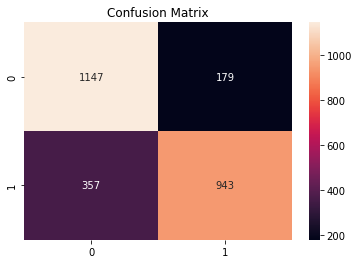

In [167]:
#Confusion matrix for Decision Tree model because the performance of model is good as compare to other model
cm=confusion_matrix(y_test1,dt_p2)
sns.heatmap(cm,annot=True,fmt='d')
plt.title('Confusion Matrix')
plt.show()

In [168]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
roc=roc_auc_score(dt_p2,y_test1)
roc

0.8015482184169607

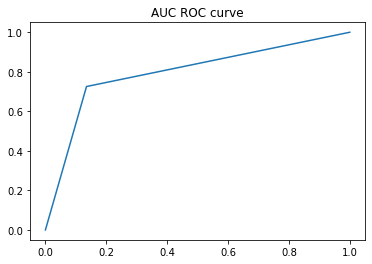

In [169]:
fpr,tpr,threshold=roc_curve(y_test1,dt_p2)
plt.plot(fpr,tpr)
plt.title("AUC ROC curve")
plt.show()

Conclusion : after Doining class imbalance and outlier treatment the accuracy of the model is inceases as compare to data Frame 1  The Accuracy and AUC are close to each other,in this case decision tree model is good fitted to the data .also True positive are the high as comapre to true negative so we can the result by using AUC- ROC curve.

# Base Model 3

In [170]:
#dt1.feature_importances_

In [171]:
#df=pd.DataFrame({"Feature_Score":list(dt.feature_importances_),"columns":list(data.iloc[:,:-1].columns)})
#df

In [172]:
#data3=data1.drop(["Warehouse_block","Mode_of_Shipment","Customer_care_calls","Customer_rating","Prior_purchases","Product_importance","Gender",],axis=1)
#data3

# Feature selection : Recursive Feature Elimination

In [173]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()

In [174]:
rfe=RFE(dtree,n_features_to_select=6)

In [175]:
rfe.fit(data1.iloc[:,:-1],data1.iloc[:,-1])

RFE(estimator=DecisionTreeClassifier(), n_features_to_select=6)

In [176]:
rfe.support_

array([False, False,  True,  True,  True,  True, False, False,  True,
        True])

In [177]:
f1=pd.DataFrame({"feature":list(rfe.support_),"col":list(data1.iloc[:,:-1].columns)})

In [178]:
f1

,feature,col
0,False,Warehouse_block
1,False,Mode_of_Shipment
2,True,Customer_care_calls
3,True,Customer_rating
4,True,Cost_of_the_Product
5,True,Prior_purchases
6,False,Product_importance
7,False,Gender
8,True,Discount_offered
9,True,Weight_in_gms


In [179]:
data3=data1.drop(["Mode_of_Shipment","Customer_care_calls","Prior_purchases","Product_importance","Gender",],axis=1)
data3

,Warehouse_block,Customer_rating,Cost_of_the_Product,Discount_offered,Weight_in_gms,Reached_on_Time_Y_N
3694,2,1,138,2.645751,74.390860,0
9439,4,4,244,1.000000,36.331804,0
10493,4,3,151,3.000000,71.288148,0
5190,3,4,231,2.000000,76.321688,0
5057,4,2,174,1.732051,76.941536,0
...,...,...,...,...,...,...
10985,4,1,229,3.162278,32.249031,1
10986,3,5,255,2.236068,38.183766,1
10987,4,3,242,3.162278,42.965102,1
10991,4,2,261,3.000000,35.028560,1


# 1)Logistic Regression

In [180]:
x2=data3.iloc[: ,0:-1]
y2=data3.iloc[:,-1]

In [181]:
x_train2,x_test2,y_train2,y_test2=train_test_split(x2,y2,test_size=0.2,random_state=101)
x_train2.shape,x_test2.shape,y_train2.shape,y_test2.shape

((10500, 5), (2626, 5), (10500,), (2626,))

In [182]:
from sklearn.linear_model import LogisticRegression
lg2=LogisticRegression()

In [183]:
lg2.fit(x_train2,y_train2)

LogisticRegression()

In [184]:
lg_p3=lg2.predict(x_test2)

In [185]:

cf_3=confusion_matrix(lg_p3,y_test2)
cf_3

array([[960, 536],
       [366, 764]], dtype=int64)

In [186]:
lg_ac3=cf_3.diagonal().sum()/cf_3.sum()*100
lg_ac3

65.65118050266565

In [187]:
re_31=recall_score(y_test2,lg_p3)
pr_31=precision_score(y_test2,lg_p3)
f31=f1_score(y_test2,lg_p3,average="weighted")
print(classification_report(lg_p3,y_test2)) 

              precision    recall  f1-score   support

           0       0.72      0.64      0.68      1496
           1       0.59      0.68      0.63      1130

    accuracy                           0.66      2626
   macro avg       0.66      0.66      0.65      2626
weighted avg       0.67      0.66      0.66      2626



# Decision Tree

In [188]:
from sklearn.tree import DecisionTreeClassifier
dt3=DecisionTreeClassifier()
dt3.fit(x_train2,y_train2)

DecisionTreeClassifier()

In [189]:
dt_p3=dt3.predict(x_test2)
#dt_p3

In [190]:
dt_c3=confusion_matrix(dt_p3,y_test2)
dt_c3

array([[1134,  336],
       [ 192,  964]], dtype=int64)

In [191]:
dt_ac3=dt_c3.diagonal().sum()/dt_c3.sum()*100
dt_ac3

79.89337395277988

In [192]:
re_32=recall_score(y_test2,dt_p3)
pr_32=precision_score(y_test2,dt_p3)
f32=f1_score(y_test2,dt_p3,average="weighted")
print(classification_report(dt_p3,y_test1))

              precision    recall  f1-score   support

           0       0.86      0.77      0.81      1470
           1       0.74      0.83      0.79      1156

    accuracy                           0.80      2626
   macro avg       0.80      0.80      0.80      2626
weighted avg       0.81      0.80      0.80      2626



# 3) Random Forest

In [193]:
from sklearn.ensemble import RandomForestClassifier
rf3=RandomForestClassifier()
rf3.fit(x_train2,y_train2)

RandomForestClassifier()

In [194]:
rf_p3=rf3.predict(x_test2)

In [195]:
rf_c3=confusion_matrix(rf_p3,y_test2)
rf_c3

array([[1197,  444],
       [ 129,  856]], dtype=int64)

In [196]:
rf_ac3=rf_c3.diagonal().sum()/rf_c3.sum()*100
rf_ac3

78.17974105102819

In [197]:
re_33=recall_score(y_test2,rf_p3)
pr_33=precision_score(y_test2,rf_p3)
f33=f1_score(y_test2,rf_p3,average="weighted")
print(classification_report(rf_p3,y_test1))

              precision    recall  f1-score   support

           0       0.90      0.73      0.81      1641
           1       0.66      0.87      0.75       985

    accuracy                           0.78      2626
   macro avg       0.78      0.80      0.78      2626
weighted avg       0.81      0.78      0.79      2626



# 4)K-Nearset Neighbors

In [198]:
from sklearn.neighbors import KNeighborsClassifier
knn3=KNeighborsClassifier()
knn3.fit(x_train2,y_train2)

KNeighborsClassifier()

In [199]:
knn_p3=knn3.predict(x_test2)

In [200]:
knn_c3=confusion_matrix(knn_p3,y_test2)
knn_c3

array([[1056,  499],
       [ 270,  801]], dtype=int64)

In [201]:
knn_ac3=knn_c3.diagonal().sum()/knn_c3.sum()*100
knn_ac3

70.71591774562071

In [202]:
re_34=recall_score(y_test2,knn_p3)
pr_34=precision_score(y_test2,knn_p3)
f34=f1_score(y_test2,knn_p3,average="weighted")
print(classification_report(knn_p3,y_test1))

              precision    recall  f1-score   support

           0       0.80      0.68      0.73      1555
           1       0.62      0.75      0.68      1071

    accuracy                           0.71      2626
   macro avg       0.71      0.71      0.70      2626
weighted avg       0.72      0.71      0.71      2626



# 5) XGB(XGBoost) 

In [203]:
import xgboost
from xgboost import XGBClassifier

In [204]:
xgb2=XGBClassifier()
xgb2.fit(x_train2,y_train2)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [205]:
xgb_p3=xgb2.predict(x_test2)
#xgb_p3

In [206]:
xgb_c3=confusion_matrix(y_test2,xgb_p3)
xgb_c3

array([[1193,  133],
       [ 507,  793]], dtype=int64)

In [207]:
xgb_ac3=xgb_c3.diagonal().sum()/xgb_c3.sum()*100
xgb_ac3

75.62833206397562

In [208]:
re_35=recall_score(y_test2,xgb_p3)
pr_35=precision_score(y_test2,xgb_p3)
f35=f1_score(y_test2,xgb_p3,average="weighted")
print(classification_report(y_test2,xgb_p3))

              precision    recall  f1-score   support

           0       0.70      0.90      0.79      1326
           1       0.86      0.61      0.71      1300

    accuracy                           0.76      2626
   macro avg       0.78      0.75      0.75      2626
weighted avg       0.78      0.76      0.75      2626



# 7)SUPPORT VECTOR MACHINE

In [209]:
from sklearn.svm import SVC
svm3=SVC()
svm3.fit(x_train2,y_train2)

SVC()

In [210]:
s_p3=svm3.predict(x_test2)

In [211]:
s_cf3=confusion_matrix(y_test2,s_p3)
s_cf3

array([[1110,  216],
       [ 610,  690]], dtype=int64)

In [212]:
s_ac3=s_cf3.diagonal().sum()/s_cf3.sum()*100
s_ac3

68.54531607006854

In [213]:
re_36=recall_score(y_test2,s_p3)
pr_36=precision_score(y_test2,s_p3)
f36=f1_score(y_test2,s_p3,average="weighted")
print(classification_report(s_p3,y_test2))

              precision    recall  f1-score   support

           0       0.84      0.65      0.73      1720
           1       0.53      0.76      0.63       906

    accuracy                           0.69      2626
   macro avg       0.68      0.70      0.68      2626
weighted avg       0.73      0.69      0.69      2626



# 7)Naive Bayes

In [214]:
from sklearn.naive_bayes import MultinomialNB
nb3=MultinomialNB()

In [215]:
nb3.fit(x_train2,y_train2)

MultinomialNB()

In [216]:
nb_p3=nb3.predict(x_test2)

In [217]:
cf_n3=confusion_matrix(y_test2,nb_p3)
cf_n3

array([[948, 378],
       [479, 821]], dtype=int64)

In [218]:
nb_ac3=cf_n3.diagonal().sum()/cf_n3.sum()*100
nb_ac3

67.36481340441736

In [219]:
re_37=recall_score(y_test2,nb_p3)
pr_37=precision_score(y_test2,nb_p3)
f37=f1_score(y_test2,nb_p3,average="weighted")
print(classification_report(nb_p3,y_test2))

              precision    recall  f1-score   support

           0       0.71      0.66      0.69      1427
           1       0.63      0.68      0.66      1199

    accuracy                           0.67      2626
   macro avg       0.67      0.67      0.67      2626
weighted avg       0.68      0.67      0.67      2626



In [220]:
Model3=["Logistic Regression","Decision Tree","Random Forest","KNN","XGB(XGBoost)","SUPPORT VECTOR MACHINE","Naive Bayes"]
Accuracy3=[lg_ac3,dt_ac3,rf_ac3,knn_ac3,xgb_ac3,s_ac3,nb_ac3]
f1_score3=[f31,f32,f33,f34,f35,f36,f37]
recall3=[re_31,re_32,re_33,re_34,re_35,re_36,re_37]
precision3=[pr_31,pr_32,pr_33,pr_34,pr_35,pr_36,pr_37]

In [221]:
DataFrame3=pd.DataFrame({"Model":Model3,"Accuracy":Accuracy3,"f1-Score":f1_score3,"recall":recall3,"precision":precision3})  
DataFrame3

,Model,Accuracy,f1-Score,recall,precision
0,Logistic Regression,65.651181,0.654843,0.587692,0.676106
1,Decision Tree,79.893374,0.798217,0.741538,0.833910
2,Random Forest,78.179741,0.778340,0.658462,0.869036
3,KNN,70.715918,0.704656,0.616154,0.747899
4,XGB(XGBoost),75.628332,0.750871,0.610000,0.856371
5,SUPPORT VECTOR MACHINE,68.545316,0.677707,0.530769,0.761589
6,Naive Bayes,67.364813,0.673040,0.631538,0.684737


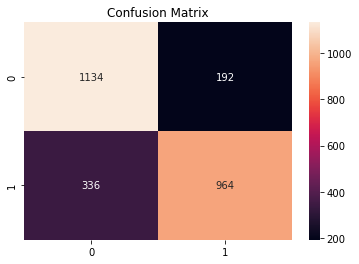

In [222]:
#Confusion matrix for Decision Tree model because the performance of model is good as compare to other model
cm=confusion_matrix(y_test2,dt_p3)
sns.heatmap(cm,annot=True,fmt='d')
plt.title('Confusion Matrix')
plt.show()

In [223]:
roc=roc_auc_score(dt_p3,y_test2)
roc

0.8026693030153239

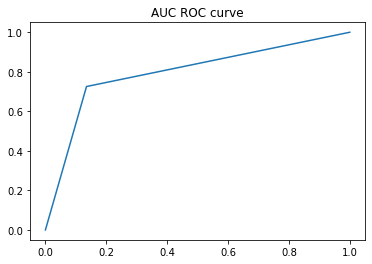

In [224]:
fpr1,tpr1,threshold=roc_curve(y_test1,dt_p2)
plt.plot(fpr1,tpr1)
plt.title("AUC ROC curve")
plt.show()

Conclusion:After Doing the feature selection the By comparing dataframe 2 and dataframe 3 performance of the model is not increases this means that feature selection does not any affect on the data in this case we can conclude that Decison tree is good fitted data.